In [1]:
# Importing libraries for data manipulation and analysis
import pandas as pd  # For working with DataFrames
import numpy as np  # For working with arrays and numerical data

# Importing libraries for plotting
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization

# Importing preprocessing library for scaling/standardizing the data
from sklearn import preprocessing  # For data scaling and normalization

# Importing module for splitting the data into training and test sets
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets

# Importing GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning

# Importing classification algorithms
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier  # K Nearest Neighbors

# Importing evaluation metric
from sklearn.metrics import confusion_matrix  # For confusion matrix evaluation


In [2]:
def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()


In [7]:
# URL of the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Load dataset into a Pandas DataFrame
data = pd.read_csv(url)

# Display the first 5 rows
data.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [8]:
#task1
# Create a NumPy array from the 'Class' column
Y = data['Class'].to_numpy()

# Check the first few values of Y to ensure it's correct
print(Y[:10])


[0 0 0 0 0 0 1 1 0 0]


In [14]:
#task2
# Identify non-numeric columns in X
non_numeric_columns = X.select_dtypes(include=['object']).columns

# Option 1: Drop non-numeric columns (if they are not necessary for your model)
X = X.drop(columns=non_numeric_columns)

# Option 2: Convert non-numeric columns to numeric (e.g., if they represent dates or categories)

# For example, converting a date column (if present) to a numerical representation
# If there is a 'LaunchDate' column, convert it to datetime and extract features like year, month, etc.
if 'LaunchDate' in X.columns:
    X['LaunchDate'] = pd.to_datetime(X['LaunchDate'])
    X['LaunchYear'] = X['LaunchDate'].dt.year
    X['LaunchMonth'] = X['LaunchDate'].dt.month
    X['LaunchDay'] = X['LaunchDate'].dt.day
    X = X.drop(columns=['LaunchDate'])  # Drop the original date column

# Now proceed with standardization
transform = preprocessing.StandardScaler()
X_scaled = transform.fit_transform(X)

# Reassign the standardized data back to X
X = X_scaled

# Proceed with splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [15]:
#task3 
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Check the shape of Y_test to confirm the number of test samples
print(Y_test.shape)


(18,)


In [16]:
#task4
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameters for GridSearchCV
parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Create the LogisticRegression object
lr = LogisticRegression()

# Create the GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# Fit the model to the training data
logreg_cv.fit(X_train, Y_train)

# Output the best hyperparameters and best accuracy score
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy on validation data:", logreg_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on validation data: 0.8339285714285714


Accuracy on the test data: 0.83


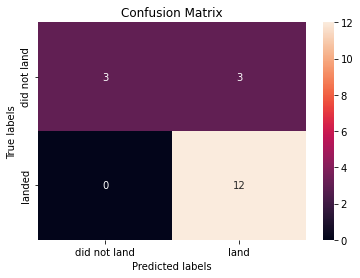

True Positives (TP): 12
False Positives (FP): 3
False Negatives (FN): 0
True Negatives (TN): 3


In [17]:
#task5
# Predict the labels for the test set
yhat = logreg_cv.predict(X_test)

# Calculate accuracy on the test data using the score method
accuracy = logreg_cv.score(X_test, Y_test)
print(f"Accuracy on the test data: {accuracy:.2f}")

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)

# Examining the confusion matrix for false positives
cm = confusion_matrix(Y_test, yhat)
tn, fp, fn, tp = cm.ravel()  # Extract True Negatives, False Positives, False Negatives, True Positives

# Output the confusion matrix components
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Negatives (TN): {tn}")


In [18]:
#task6
# Import SVC for Support Vector Machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid for the SVM model
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),  # Different values for the regularization parameter
    'gamma': np.logspace(-3, 3, 5)  # Different values for the kernel coefficient
}

# Create the SVM model
svm = SVC()

# Create the GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the model to find the best parameters
svm_cv.fit(X_train, Y_train)

# Output the best hyperparameters
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)

# Output the best score (accuracy on the validation data)
print("Accuracy (best score):", svm_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}
Accuracy (best score): 0.875


Test Accuracy: 0.8333333333333334


C:\Users\VVIET Adviser\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


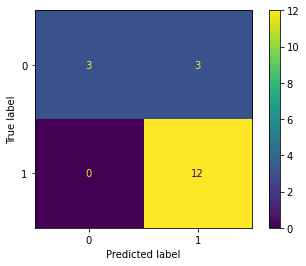

In [19]:
#task7
from sklearn.metrics import plot_confusion_matrix

# Calculate the accuracy on the test data using the score method
accuracy = svm_cv.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

# Predict on the test data using the best model found by GridSearchCV
yhat = svm_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(svm_cv, X_test, Y_test)


In [20]:
#task8
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2 * n for n in range(1, 10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

# Create the Decision Tree Classifier object
tree = DecisionTreeClassifier()

# Create the GridSearchCV object with cross-validation set to 10
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# Fit the grid search object to the training data (X_train, Y_train)
tree_cv.fit(X_train, Y_train)

# Output the best hyperparameters and the best accuracy from the cross-validation
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)


Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy: 0.9


Accuracy on test data: 0.7777777777777778


C:\Users\VVIET Adviser\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


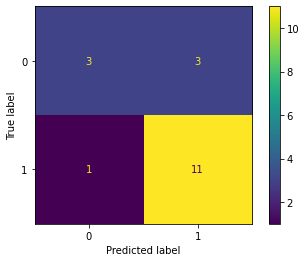

In [21]:
#task9
from sklearn.metrics import plot_confusion_matrix

# Calculate the accuracy on the test data
accuracy = tree_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)

# Predict the labels for the test data
yhat = tree_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(tree_cv, X_test, Y_test)


In [22]:
#task10
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Create the KNeighborsClassifier object
KNN = KNeighborsClassifier()

# Create GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the model to find the best parameters
knn_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("tuned hyperparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)


tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 2}
accuracy : 0.8607142857142855


Accuracy on the test data: 0.8333333333333334


C:\Users\VVIET Adviser\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


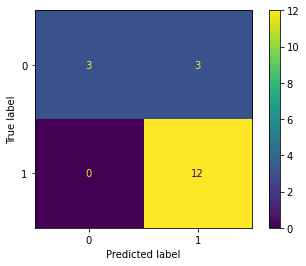

In [23]:
#task11
from sklearn.metrics import plot_confusion_matrix

# Calculate accuracy on the test data
accuracy = knn_cv.score(X_test, Y_test)
print("Accuracy on the test data:", accuracy)

# Predict the labels on the test set
yhat = knn_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(knn_cv, X_test, Y_test)


#task12
Best Performing Model: Support Vector Machine (SVM) with an accuracy of 0.833 on the test set and 0.875 as the best validation score.